## Dane

In [1]:
import pandas as pd

dataframe = pd.read_csv("./data/spam.dat")

X = dataframe.drop(['target'], axis = 1)
y = dataframe.target

print(X.shape)
print(y.shape)

(4789, 462)
(4789,)


## Klasyfikator - Drzewo decyzyjne (DecisionTreeClassifier)

In [2]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def DecisionTreeClassification(max_depth_arg):
    clf = DecisionTreeClassifier(max_depth = max_depth_arg, random_state = 123)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(clf, X_test, y_test)     
    report = classification_report(y_test, y_pred, output_dict=True)
    
    FNR = round((1 - report['yes']['recall']) * 100, 2)
    FPR = round((1 - report['no']['recall']) * 100, 2)
    
    print(
        'Max depth:', max_depth_arg,
        ' | FNR:', FNR, ' %',
        ' | FPR:', FPR, ' % |\n'
    )
    
    plt.show()
    
    return FNR, FPR

## Parametry klasyfikatora

* Maksymalna wysokość drzewa decyzyjnego (5, 6, 7, 8, 9, 10, 12, 15)

Max depth: 5  | FNR: 11.32  %  | FPR: 0.1  % |



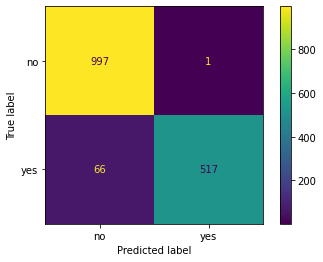

Max depth: 6  | FNR: 9.26  %  | FPR: 0.1  % |



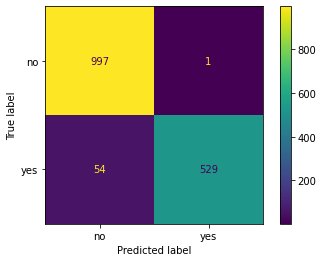

Max depth: 7  | FNR: 7.89  %  | FPR: 0.4  % |



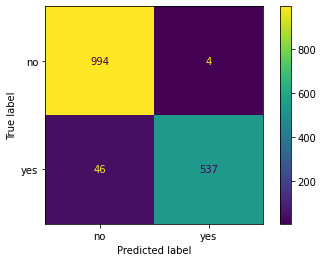

Max depth: 8  | FNR: 6.35  %  | FPR: 0.4  % |



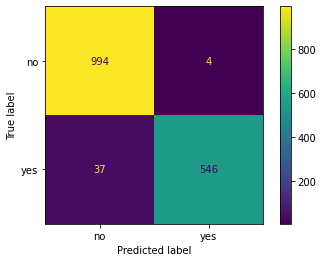

Max depth: 9  | FNR: 6.0  %  | FPR: 0.5  % |



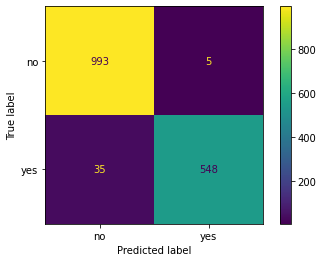

Max depth: 10  | FNR: 5.66  %  | FPR: 0.5  % |



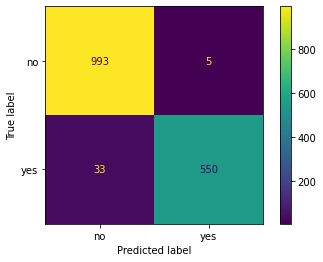

Max depth: 12  | FNR: 5.32  %  | FPR: 0.5  % |



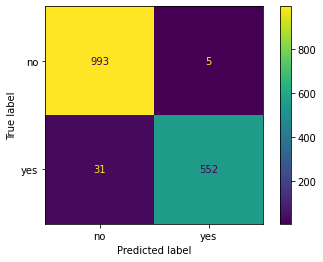

Max depth: 15  | FNR: 4.8  %  | FPR: 0.8  % |



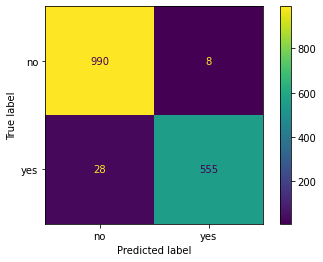

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.33)

fnr_arr = []
fpr_arr = []

depth_arr = [5, 6, 7, 8, 9, 10, 12, 15]

for depth in depth_arr:
    fnr, fpr = DecisionTreeClassification(depth)
    
    fnr_arr.append(fnr)
    fpr_arr.append(fpr)

### Wykres FNR w zależności od wysokości drzewa decyzyjnego

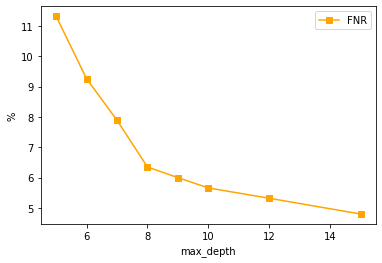

In [4]:
plt.plot(depth_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.xlabel('max_depth')
plt.ylabel('%')
plt.legend()
plt.show()

### Wykres FPR w zależności od wysokości drzewa decyzyjnego

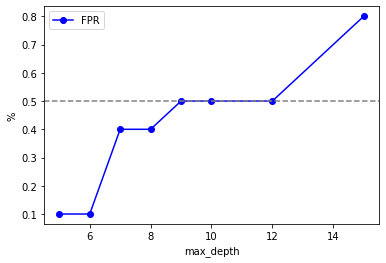

In [5]:
plt.plot(depth_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('max_depth')
plt.ylabel('%')
plt.legend()
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.show()

### Wykres porównawczy FNR i FPR w zależności od wysokości drzewa decyzyjnego

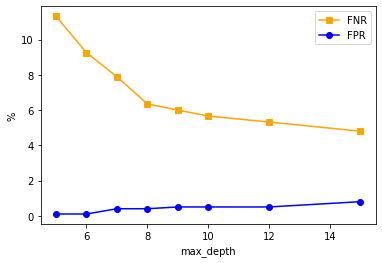

In [6]:
plt.plot(depth_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.plot(depth_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('max_depth')
plt.ylabel('%')
plt.legend()
plt.show()

## Redukcja wymiarowości danych (feature selection)

* PCA - n_components (25, 50, 100, 200)
* RFE - n_features_to_select (25, 50, 100, 200)

N_components: 25 

Max depth: 8  | FNR: 5.66  %  | FPR: 2.1  % |



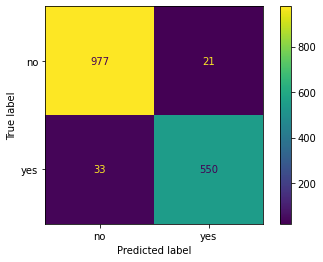

N_components: 50 

Max depth: 8  | FNR: 4.63  %  | FPR: 1.6  % |



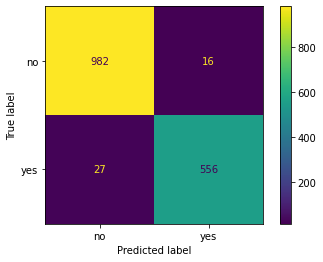

N_components: 100 

Max depth: 8  | FNR: 4.8  %  | FPR: 2.81  % |



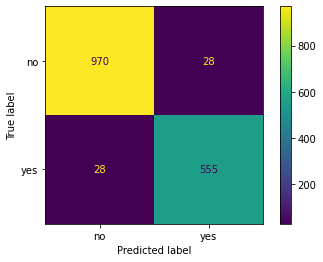

N_components: 200 

Max depth: 8  | FNR: 4.8  %  | FPR: 1.3  % |



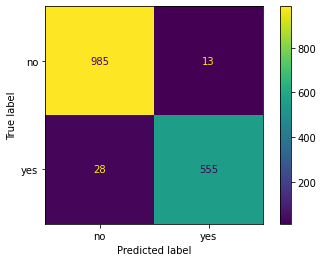

In [7]:
from sklearn.decomposition import PCA

components_arr = [25, 50, 100, 200]

fnr_arr = []
fpr_arr = []

for n in components_arr:

    pca = PCA(n_components = n, random_state = 123)

    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=123, test_size=0.33)

    print('N_components:', n, '\n')
    
    fnr, fpr = DecisionTreeClassification(max_depth_arg = 8)
    
    fnr_arr.append(fnr)
    fpr_arr.append(fpr)

### Wykres FNR w zależności od n kompentów redukcji PCA

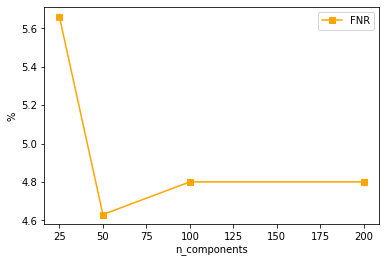

In [8]:
plt.plot(components_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.xlabel('n_components')
plt.ylabel('%')
plt.legend()
plt.show()

### Wykres FPR w zależności od n kompentów redukcji PCA

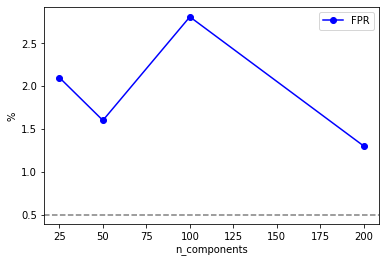

In [9]:
plt.plot(components_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('n_components')
plt.ylabel('%')
plt.legend()
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.show()

n_features_to_select: 25 

Max depth: 8  | FNR: 6.0  %  | FPR: 0.4  % |



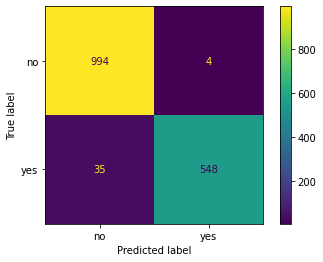

n_features_to_select: 50 

Max depth: 8  | FNR: 6.0  %  | FPR: 0.4  % |



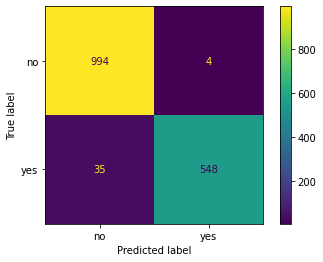

n_features_to_select: 100 

Max depth: 8  | FNR: 6.35  %  | FPR: 0.4  % |



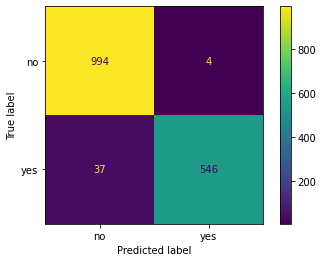

n_features_to_select: 200 

Max depth: 8  | FNR: 6.52  %  | FPR: 0.4  % |



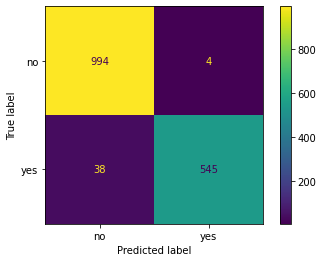

In [10]:
from sklearn.feature_selection import RFE

components_arr = [25, 50, 100, 200]

fnr_arr = []
fpr_arr = []

for n in components_arr:

    rfe = RFE(estimator=DecisionTreeClassifier(max_depth = 10, random_state = 123), n_features_to_select=n)

    X_rfe = rfe.fit_transform(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, random_state=123, test_size=0.33)

    print('n_features_to_select:', n, '\n')
    
    fnr, fpr = DecisionTreeClassification(max_depth_arg = 8)
    
    fnr_arr.append(fnr)
    fpr_arr.append(fpr)

### Wykres FNR w zależności od n cech redukcji RFE

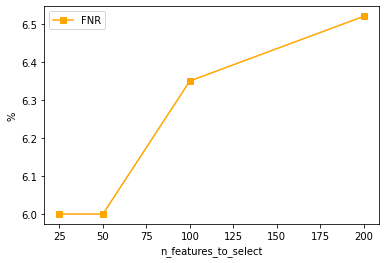

In [11]:
plt.plot(components_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.xlabel('n_features_to_select')
plt.ylabel('%')
plt.legend()
plt.show()

### Wykres FPR w zależności od n cech redukcji RFE

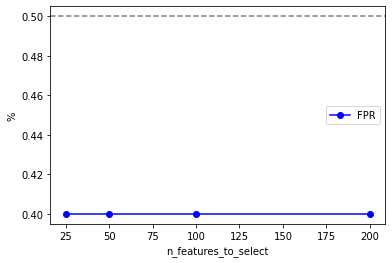

In [12]:
plt.plot(components_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('n_features_to_select')
plt.ylabel('%')
plt.legend()
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.show()

## Zastosowanie niesymetrycznych kosztów błędów (cost sensitive)

* Pary wagi klas (yes - no / no - yes) (0.125 - 0.875, 0.25 - 0.75, 0.375 - 0.625)

In [13]:
def DecisionTreeCostSensitiveClassification(max_depth_arg, yes_arg, no_arg):
    clf = DecisionTreeClassifier(max_depth = max_depth_arg, class_weight={'yes': yes_arg, 'no': no_arg}, random_state = 123)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(clf, X_test, y_test)     
    report = classification_report(y_test, y_pred, output_dict=True)
    
    FNR = round((1 - report['yes']['recall']) * 100, 2)
    FPR = round((1 - report['no']['recall']) * 100, 2)
    
    print(
        'Yes:', yes_arg,
        ' | No:', no_arg,
        ' | FNR:', FNR, ' %',
        ' | FPR:', FPR, ' % |\n'
    )
    
    plt.show()
    
    return FNR, FPR

Yes: 0.125  | No: 0.875  | FNR: 9.43  %  | FPR: 0.6  % |



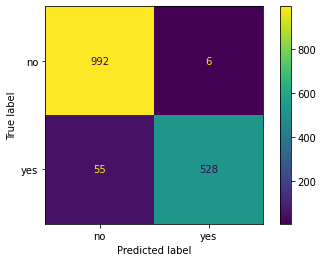

Yes: 0.25  | No: 0.75  | FNR: 7.72  %  | FPR: 0.3  % |



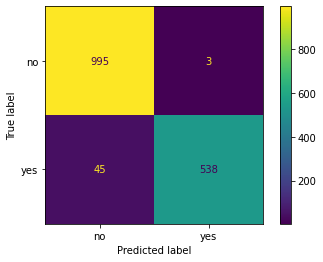

Yes: 0.375  | No: 0.625  | FNR: 6.35  %  | FPR: 0.4  % |



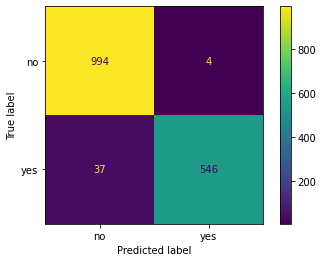

Yes: 0.625  | No: 0.375  | FNR: 7.55  %  | FPR: 1.2  % |



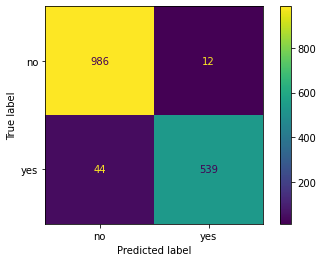

Yes: 0.75  | No: 0.25  | FNR: 3.6  %  | FPR: 5.61  % |



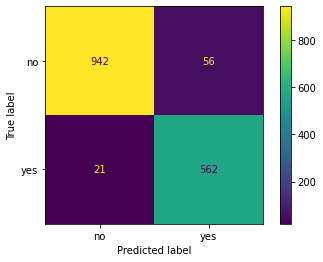

Yes: 0.875  | No: 0.125  | FNR: 3.09  %  | FPR: 4.61  % |



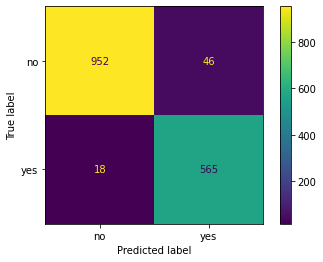

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.33)

fnr_arr = []
fpr_arr = []

cost_arr = [0.125, 0.25, 0.375, 0.625, 0.75, 0.875]

for i in range(len(cost_arr)):
    fnr, fpr = DecisionTreeCostSensitiveClassification(8, cost_arr[i], cost_arr[len(cost_arr) - i - 1])
    
    fnr_arr.append(fnr)
    fpr_arr.append(fpr)

### Wykres porównawczy FNR i FPR w zależności od kosztów błędów

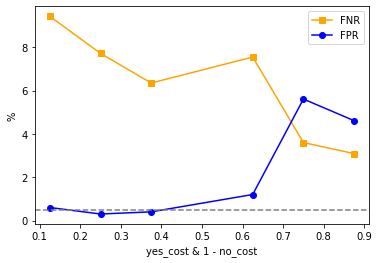

In [15]:
plt.plot(cost_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.plot(cost_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('yes_cost & 1 - no_cost')
plt.ylabel('%')
plt.legend()
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.show()

## Składanie modeli (ensamble learning)

* AdaBoost

In [16]:
from sklearn.ensemble import AdaBoostClassifier
    
def AdaBoostDecisionTreeClassification(max_depth_arg):
    clf = AdaBoostClassifier(
        base_estimator = DecisionTreeClassifier(max_depth = max_depth_arg), 
        random_state = 123,
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(clf, X_test, y_test)  
    report = classification_report(y_test, y_pred, output_dict=True)
    
    print(
        'Max depth:', max_depth_arg,
        ' | FNR:', round((1 - report['yes']['recall']) * 100, 2), ' %',
        ' | FPR:', round((1 - report['no']['recall']) * 100, 2), ' % |\n'
    )
    
    plt.show()

Max depth: 8  | FNR: 4.8  %  | FPR: 0.8  % |



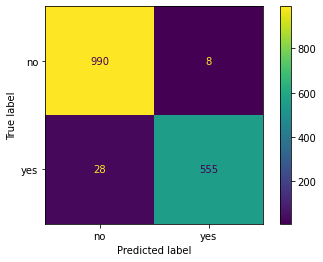

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.33)

AdaBoostDecisionTreeClassification(max_depth_arg = 8)